## Import Libraries


In [3]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
%matplotlib inline

## Create Training DataSet from PNG Images

In [4]:
def create_dataset():
    X=np.zeros((45,10))
    for i in range(10):
        image_path= 'hand_digits/'+str(i)+'.PNG' #image path
        image = Image.open(image_path) #import the images into python
        image= image. convert('1')  #Converts image into binary format
        image= image.resize((5,9), resample=0) #Reshaps image into 5,9 size
        pix_val = np.array(list(image.getdata())).astype('float32') / 255.0 #normalized pixel values
        X[:,i]=pix_val #store each pixel into X
    
    return X
       
X_train= create_dataset() #calls the create_dataset() to get the training data
X_train[:,1]=np.array([1,1,0,1,1, 1,0,0,1,1, 0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1]) #since digit 1 has a lot of noise
X_train= np.transpose(X_train) #takes transpose to convert to (10,45)
Y_train= np.array([0,1,2,3,4,5,6,7,8,9]) #Y_train contains the true labels for each digit


## Plot the Bitmap Images to Visualize the Training Data Set

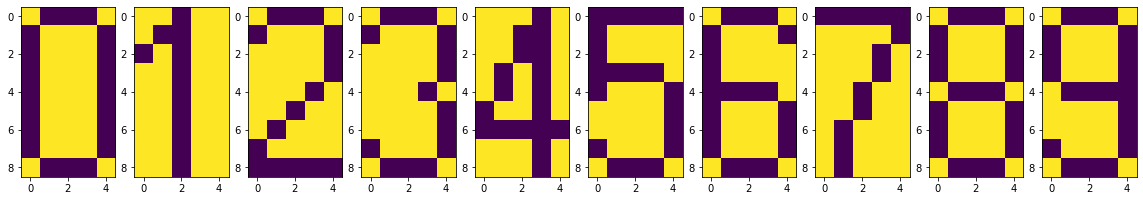

In [16]:
fig, ax= plt.subplots(1,10,figsize=(20,20)) #10 axes for individual figures
for i in range(10): 
    ax[i].imshow(X_train[i].reshape(9,5))  #plot each image

## Build the ANN Model

In [17]:

#Define the model by specifying layers and activation func etc
inputs= tf.keras.Input(shape=(45)) #input layer
x= tf.keras.layers.Dense(5, activation='relu')(inputs) #Hidden layer
outputs= tf.keras.layers.Dense(10, activation='softmax')(x) #Output layer
model= tf.keras.Model(inputs=inputs, outputs= outputs) #creates the model

#Compile the Model and specify the Type of Loss, Optimizer and Metrics
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= ['Accuracy']
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 45)]              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 230       
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


## Run the Gradient Descent

In [1]:
#result= model.fit(X_train,Y_train,epochs=300, batch_size=10, verbose='auto')


## Plot the Loss and Accuracy

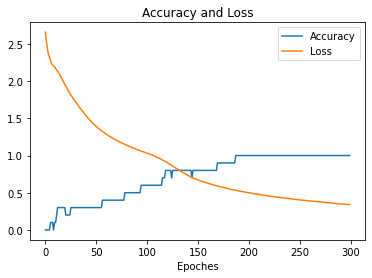

In [19]:
accuracy_hist= result.history['Accuracy']
loss_hist= result.history['loss']
plt.plot(accuracy_hist)
plt.plot(loss_hist)
plt.xlabel('Epoches')
plt.title('Accuracy and Loss')
plt.legend(['Accuracy', 'Loss'])

## Evaluate and Save the Model

In [23]:
#model.save('hand_digit_recognition_final.model')
model.evaluate(X_train,Y_train)
predictions= model.predict([X_train])
for element in predictions:
    print(np.argmax(element))

1/1 [==============================] - 0s 16ms/step - loss: 0.3386 - Accuracy: 1.0000
0
1
2
3
4
5
6
7
8
9


## Add Noise into the Data to get Test Set

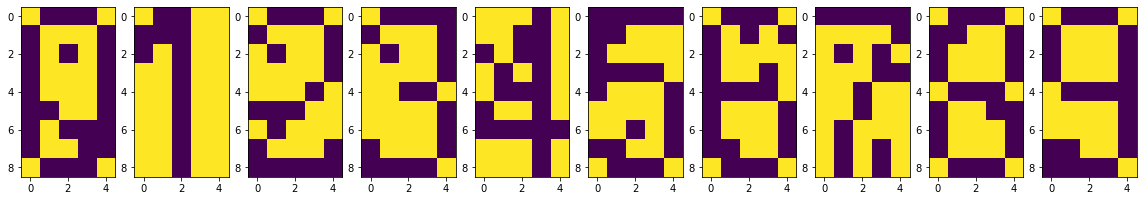

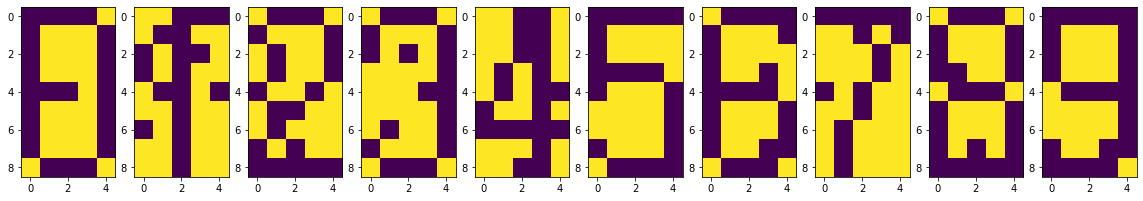

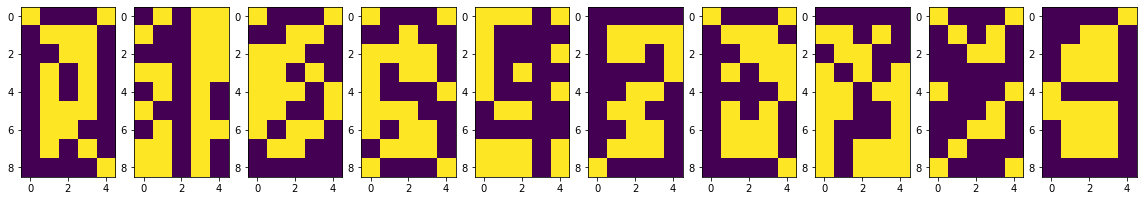

In [89]:
#generate 30 different examples for the test set.
X_test1= X_train - np.floor(1.1*np.random.rand(10,45))*X_train #adds noise with a given amplitude
X_test2= X_train - np.floor(1.2*np.random.rand(10,45))*X_train #adds noise with a given amplitude
X_test3= X_train - np.floor(1.3*np.random.rand(10,45))*X_train #adds noise with a given amplitude

fig1, ax1= plt.subplots(1,10,figsize=(20,20)) #fig for first 10 test sets
fig2, ax2= plt.subplots(1,10,figsize=(20,20)) #fig for 11 - 20 test sets
fig3, ax3= plt.subplots(1,10,figsize=(20,20)) #fig for 20 - 30 test sets

for i in range(10):
    ax1[i].imshow(X_test1[i].reshape(9,5)) #plot the test set

for i in range(10):
    ax2[i].imshow(X_test2[i].reshape(9,5)) #plot the test set
    
for i in range(10):
    ax3[i].imshow(X_test3[i].reshape(9,5)) #plot the test set


## Evaluate the Test Cases

In [96]:
model.evaluate(X_test1,Y_train)
model.evaluate(X_test2,Y_train)
model.evaluate(X_test3,Y_train)
predictions1= model.predict([X_test1])
predictions2= model.predict([X_test2])
predictions3= model.predict([X_test3])

print("Truth    TS1    TS2       TS3")
for element in range(10):
    print(str(element) + '         ' +str(np.argmax(predictions1[element])) + '       ' + 
    str(np.argmax(predictions2[element])) + '        ' + 
    str(np.argmax(predictions3[element])) + '       '
    )

1/1 [==============================] - 0s 19ms/step - loss: 1.4176 - Accuracy: 0.6000
Truth    TS1    TS2       TS3
0         9       6        8       
1         1       7        5       
2         2       2        3       
3         3       3        3       
4         4       4        4       
5         5       5        5       
6         6       6        6       
7         7       7        7       
8         8       9        6       
9         9       9        9       


In [165]:
X_test= np.zeros((30,45))
Y_test= np.zeros((30,))
X_test[0:10,:]= X_test1
X_test[10:20,:]= X_test2
X_test[20:30,:]= X_test3
Y_test[0:10]= Y_train
Y_test[10:20]= Y_train
Y_test[20:30]= Y_train
predictions= model.predict([X_test])

#evaluate and Predict
model.evaluate(X_test,Y_test)
print("Truth    Predict")
for element in range(30):
    print(str(int(Y_test[element])) + '         ' +str(np.argmax(predictions[element])))


1/1 [==============================] - 0s 16ms/step - loss: 1.1618 - Accuracy: 0.7333
Truth    Predict
0         9
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
0         6
1         7
2         2
3         3
4         4
5         5
6         6
7         7
8         9
9         9
0         8
1         5
2         3
3         3
4         4
5         5
6         6
7         7
8         6
9         9


## Predict using a CNN

In [9]:
inputs= tf.keras.Input(shape=(9,5,1))
x= tf.keras.layers.Conv2D(3, (1,1), padding='valid', activation='relu')(inputs)
x= tf.keras.layers.MaxPooling2D(pool_size=(1,1))(x)
x= tf.keras.layers.Conv2D(2, (5,5), padding='valid', activation='relu')(x)
x= tf.keras.layers.MaxPooling2D(pool_size=(1,1))(x)
x= tf.keras.layers.Flatten()(x)
outputs= tf.keras.layers.Dense(10, activation='softmax')(x)
model_CNN= tf.keras.Model(inputs=inputs, outputs= outputs)

#Compile the Model and specify the Type of Loss, Optimizer and Metrics
model_CNN.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics= ['Accuracy']
)
model_CNN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9, 5, 1)]         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 5, 3)           6         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 5, 3)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 1, 2)           152       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 1, 2)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10)                0   

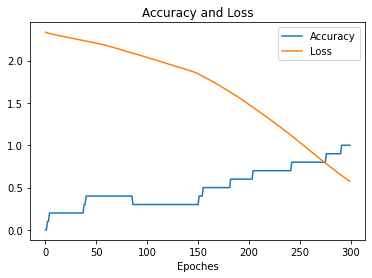

In [11]:
X_train_CNN= X_train.reshape(-1, 9,5)
#result= model_CNN.fit(X_train_CNN,Y_train,epochs=300, batch_size=10, verbose='auto')
accuracy_hist= result.history['Accuracy']
loss_hist= result.history['loss']
plt.plot(accuracy_hist)
plt.plot(loss_hist)
plt.xlabel('Epoches')
plt.title('Accuracy and Loss')
plt.legend(['Accuracy', 'Loss'])

## Evaluate CNN on Training Set

In [427]:
model_CNN.save('hand_digit_recognition_final_CNN.model')
model_CNN.evaluate(X_train_CNN,Y_train)
predictions= model_CNN.predict([X_train_CNN])
for element in predictions:
    print(np.argmax(element))

INFO:tensorflow:Assets written to: hand_digit_recognition_final_CNN.model\assets
1/1 [==============================] - 0s 85ms/step - loss: 0.4493 - Accuracy: 1.0000
0
1
2
3
4
5
6
7
8
9


## Evaluate CNN on 30 Test Sets

In [428]:
#Reshape the Test Set for CNN

X_test_CNN= X_test.reshape(-1,9,5)

#evaluate and Predict
model_CNN.evaluate(X_test_CNN,Y_test)
predictions= model_CNN.predict([X_test_CNN])

print("Truth    Predict")
for element in range(30):
    print(str(int(Y_test[element])) + '         ' +str(np.argmax(predictions[element])))
    

1/1 [==============================] - 0s 15ms/step - loss: 0.7786 - Accuracy: 0.8667
Truth    Predict
0         0
1         3
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         3
0         6
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
0         0
1         1
2         2
3         9
4         4
5         5
6         6
7         7
8         8
9         9
